# 6. Hypothesentest

## 6.2	Zugversuche an Bond-Verbindungen

a) Jede Gruppe weist eine Normalverteilung auf, außerdem ist die Standardabweichung be-kannt. Damit ist die Größe z standardnormalverteilt. 


$z = \frac{{\bar x - \mu }}{{\frac{\sigma }{{\sqrt N }}}} = \sqrt N  \cdot \frac{{\bar x - \mu }}{\sigma }$

Mit


$c = {F^{ - 1}}(0.975) = 1.96$

berechnet sich das Konfidenzintervall zu

$\bar x - c \cdot \frac{\sigma }{{\sqrt N }} \le \mu  \le \bar x + c \cdot \frac{\sigma }{{\sqrt N }}$

Die Rechnung muss für jede Drahtlänge angewendet werden. Deshalb können Matrix-Operationen verwendet werden. 


In [1]:
""" Bibliotheken importieren"""
from scipy.io import  loadmat
import scipy.stats as stats
from scipy.stats import norm   # normal-Verteilung
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


'''Daten laden, Variablenname Zugfestigkeit'''
zugfestigkeit=loadmat('zugversuch')['zugfestigkeit']

laenge =np.arange(2.8,3.6,0.2)

N = 10

'''Konfidenzbereich des Mittelwertes'''
mu = np.mean(zugfestigkeit, axis=0)  #axis=1 berechnet den Mittelwert für jede Zeile ;  axis=0 für jede Spalte
sig = 1.5
c = norm.ppf(0.975,0,1)
min = mu - c*sig/np.sqrt(N)
max = mu + c*sig/np.sqrt(N)
min, max

(array([25.35530745, 25.59630745, 25.53230745, 22.83530745, 25.43930745]),
 array([27.21469255, 27.45569255, 27.39169255, 24.69469255, 27.29869255]))

##### Es ergeben sich folgende Bilder:

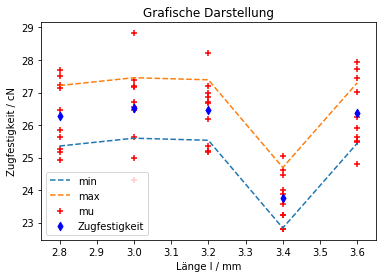

In [2]:
plt.scatter(np.ones((10,1))*laenge, zugfestigkeit, marker='+', color='r', linewidths=0.01)
plt.scatter(laenge ,mu, marker='d', color='b')
plt.plot(laenge,min, '--')
plt.plot(laenge,max, '--')
plt.xlabel('Länge l / mm')
plt.ylabel('Zugfestigkeit / cN')
plt.title('Grafische Darstellung')
plt.legend(('min', 'max', 'mu', 'Zugfestigkeit' ))

Text(0.5, 1.0, 'Box-Plot')

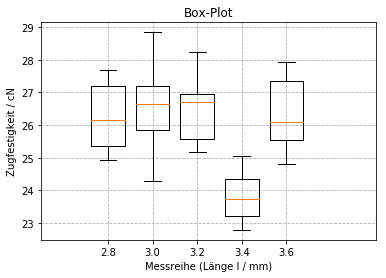

In [3]:
plt.boxplot(zugfestigkeit, positions=[2.8, 3. , 3.2, 3.4, 3.6])
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Messreihe (Länge l / mm)')
plt.ylabel('Zugfestigkeit / cN')
plt.xlim(right=4, left=2.5)
plt.title('Box-Plot')

b) Wenn die Resonanz ausgeprägt ist, führt sie zu Vorschädigungen und damit zu einer verminderten Zugfestigkeit. Bei der Drahtlänge von 3.4 mm ist die Zugfestigkeit gegenüber den anderen Längen verringert. Es wird deshalb vermutet, dass die Resonanz bei dieser Drahtlän-ge auftritt.



c) Die Hypothesen sind

    H0:	Mittelwerte der Gruppe mit Drahtlänge 3.4 mm und den anderen Gruppe sind iden-tisch
    H1:	Mittelwert der Gruppe mit Drahtlänge 3.4 mm ist kleiner 

Wenn die Nullhypothese stimmt, sind sie Mittelwerte beider Gruppe gleich. Außerdem ist die Standardabweichung $\sigma$ bekannt. Damit ist die Zufallsvariable


#### $z = \frac{{{{\bar x}_1} - {{\bar x}_2}}}{{\sqrt {\sigma _{\bar x}^2} }} = \frac{{{{\bar x}_1} - {{\bar x}_2}}}{{\sqrt {{\sigma ^2} \cdot \left( {\frac{1}{N} + \frac{1}{M}} \right)} }}$


standardnormalverteilt.
Es liegt ein einseitiges Verwerfungsintervall vor. Für ein Signifikanzniveau von $ \alpha $ = 5 % ergibt sich mit 

$c = {F^{ - 1}}\left( \alpha  \right) =  - 1.6449$


der Annahmebereich für die Nullhypothese zu


Der Grenzwert beträgt - 0.3084. Im Vergleich dazu liegt die Differenz der Mittelwerte mit - 2.6455 deutlich unter dieser Grenze, sodass die Nullhypothese verworfen wird. Es liegt eine signifikante Abweichung vor.





In [4]:
'''Berechnung ANOVA (Analysis of Variance)'''
'''pval beträgt 5.3E-7, signifikante Abweichung von Gruppe zu Gruppe anova1(zugfestigkeit)'''

stats.f_oneway(zugfestigkeit[:,0],zugfestigkeit[:,1],zugfestigkeit[:,2],zugfestigkeit[:,3], zugfestigkeit[:,4])

F_onewayResult(statistic=12.72395374722462, pvalue=5.233347070757208e-07)

In [5]:
'''Hypothresentest, dass die Reihe mit einer Länge von 3.4 mm signifikant
   nach unten abweicht, Berechneung der kritischen Annahmegrenze''' 
N = 10
M = 40
sig = 1.5
muN = np.mean(zugfestigkeit[ :,3])
muM = np.mean([zugfestigkeit[:,0], zugfestigkeit[:,1], zugfestigkeit[:,2], zugfestigkeit[:,4]])
dmu = muN - muM
sigeff = sig*(1/M + 1/N)
c1a = norm.ppf(0.05,0,1)
xquergrenza = c1a*sigeff
Ha = dmu < xquergrenza

Ha,xquergrenza

(True, -0.30841005505340113)

d) Wird das Signifikantniveau auf 1 % gesenkt, verschiebt sich die Grenze für den Annahme-bereich zu - 0.4362. Es wird der Fehler erster Art verringert, also der Fehler, bei dem gleiche Mittelwerte als unterschiedlich bewertet werden. Allerdings wird der Fehler 2. Art vergrößert. Damit wird eine Mittelwertverschiebung erst größeren Abweichungen erkannt.

In [6]:
''' Änderung des Signifikanzniveaus aus 1 %'''
c1b = norm.ppf(0.01,0,1)
xquergrenzb = c1b*sigeff
Hb = dmu < xquergrenzb
Hb,xquergrenzb

(True, -0.43619022638265764)